# TRABAJO SEMANAL 7

> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas y desarrollo </u>  ##

In [1]:
from IPython.display import IFrame
IFrame("./TS7_TC2_R4001FabrizioHermosa.pdf", width=900, height=1000)

## <u> Simulaciones en python </u> ##

## <u> Punto 1 </u> ##

### <u> Ejercicio 2 </u> ###

In [2]:
#Importo librerias de la catedra
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2
from pytc2.general import print_latex

In [3]:
# Para fijar el estilo de gráficos en el notebook
fig_sz_x = 13
fig_sz_y = 10
fig_dpi = 80
fig_font_size = 12

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})

In [4]:
#Verificacion simbolica ej 2

s, z = sp.symbols('s z', complex = True)
k = sp.symbols('k', real = True, positive = True)

TB = 1/(s**2+s*np.sqrt(2)+1) #transferencia butterworth orden 2
FB = k*((z-1)/(z+1)) # transformada bilineal

Tz = sp.collect(sp.simplify(sp.expand(TB.subs(s, FB))), z)

print("Transferencia Butterworth orden 2 analógico")
print_latex('T(s) = ' + sp.latex(TB))

print("Transferencia del filtro digital correspondiente")
print_latex('T(z) = ' + sp.latex(Tz))

Transferencia Butterworth orden 2 analógico


<IPython.core.display.Math object>

Transferencia del filtro digital correspondiente


<IPython.core.display.Math object>

In [5]:
#como me pide repetir lo mismo para distintas frec defino una funcion
def graf(fc, fs):
    norma = fc #normalizo con fc
    fc = fc/norma
    fs = fs/norma

    #Analogico
    z,p,k = sig.buttap(2)
    z,p,k = sig.lp2lp_zpk(z,p,k, wo=2*np.pi*fc)

    n, d = sig.zpk2tf(z,p,k)
    tf = sig.TransferFunction(n, d)
    
    #Digital
    n_z, d_z = sig.bilinear(n, d, fs = fs)
    tf_z = sig.TransferFunction(n_z, d_z, dt = 1/fs)

    #Printeo
    plt.close('all')
    wrad_z, hh_z = sig.freqz(n_z, d_z)
    ww_z = wrad_z / np.pi

    #Polos y ceros
    tc2.pzmap(tf_z, annotations=True, filter_description="Butterworth digital de 2do orden", fig_id=2, digital=True)
    
    plt.figure(1)
    #Modulo
    plt.subplot(2,1,1)
    plt.grid(visible=True)
    plt.title("Respuesta de módulo")
    plt.ylabel("Módulo [dB]")
    plt.plot(ww_z, 20*np.log10(abs(hh_z)), color = 'b', label='Butterworth digital de 2do orden')
    axes_hdl = plt.gca()
    axes_hdl.legend()

    #Fase
    plt.subplot(2,1,2)
    plt.grid(visible=True)
    plt.title("Respuesta de fase")
    plt.ylabel("Fase [deg]")
    plt.xlabel("Frecuencia normalizada [fs/2]")
    plt.plot(ww_z, np.angle(hh_z, deg=True), color = 'b', label='Butterworth digital de 2do orden')
    axes_hdl = plt.gca()
    axes_hdl.legend()

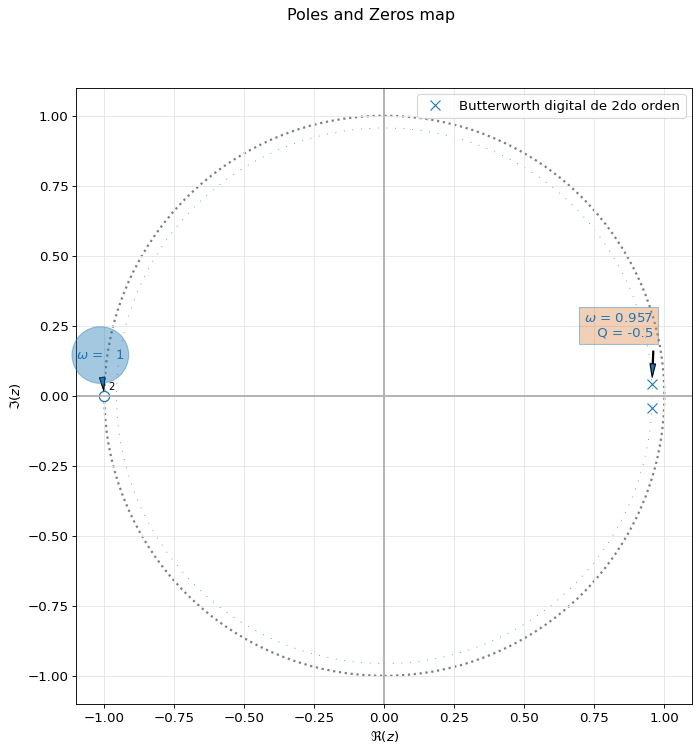

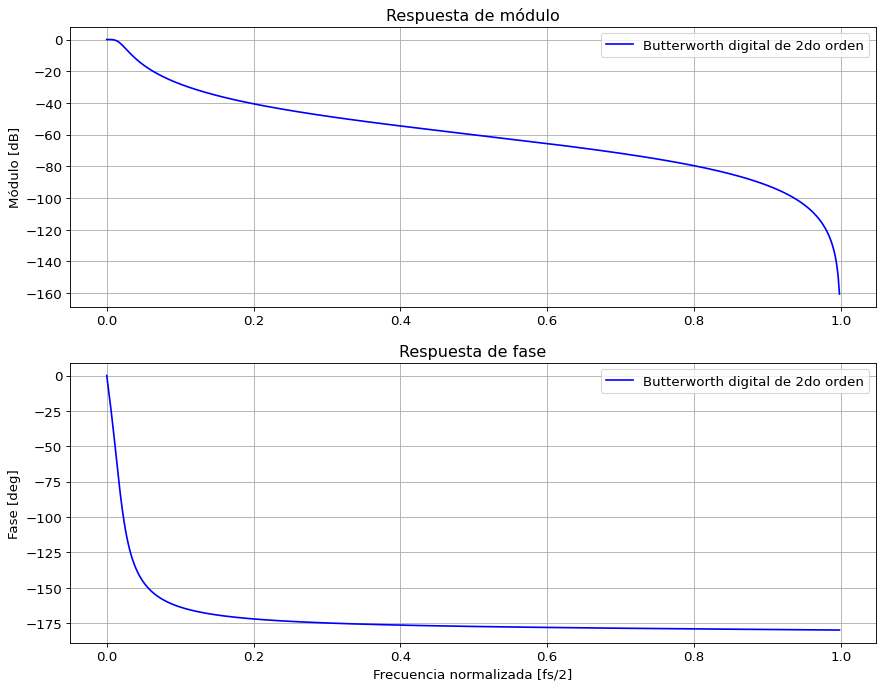

In [6]:
#Ej 2.a
fc = 1e3
fs = 100e3
graf(fc, fs) 

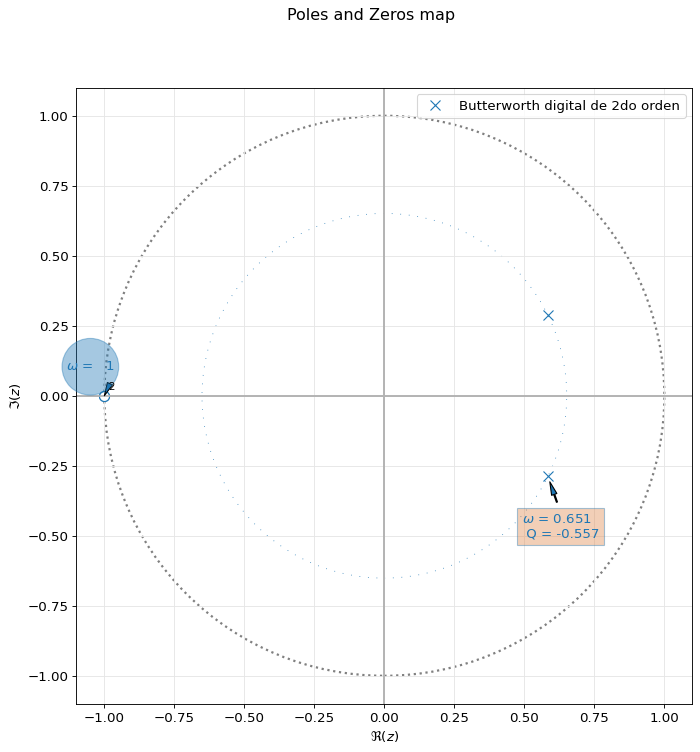

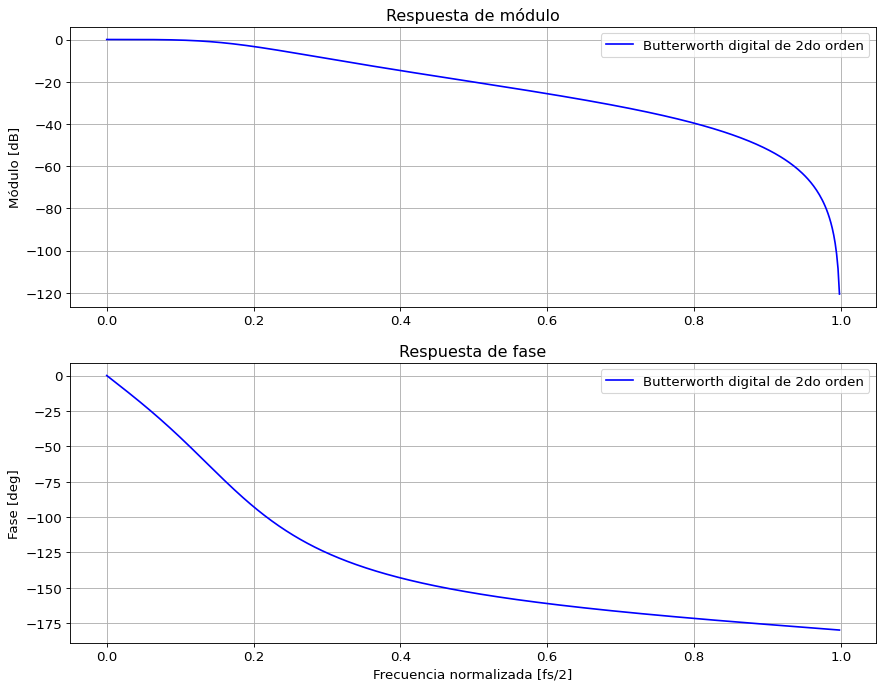

In [7]:
#Ej 2.b
fc = 1e3
fs = 10e3
graf(fc, fs)

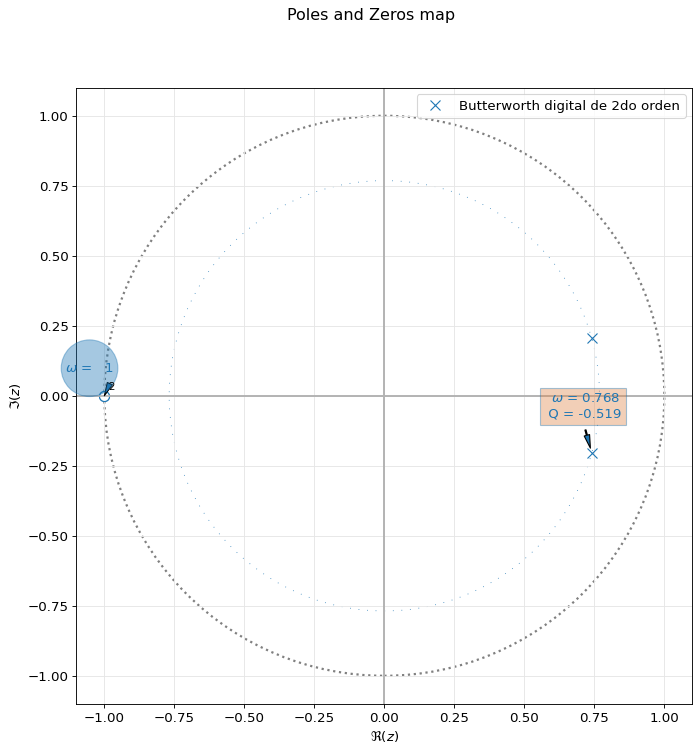

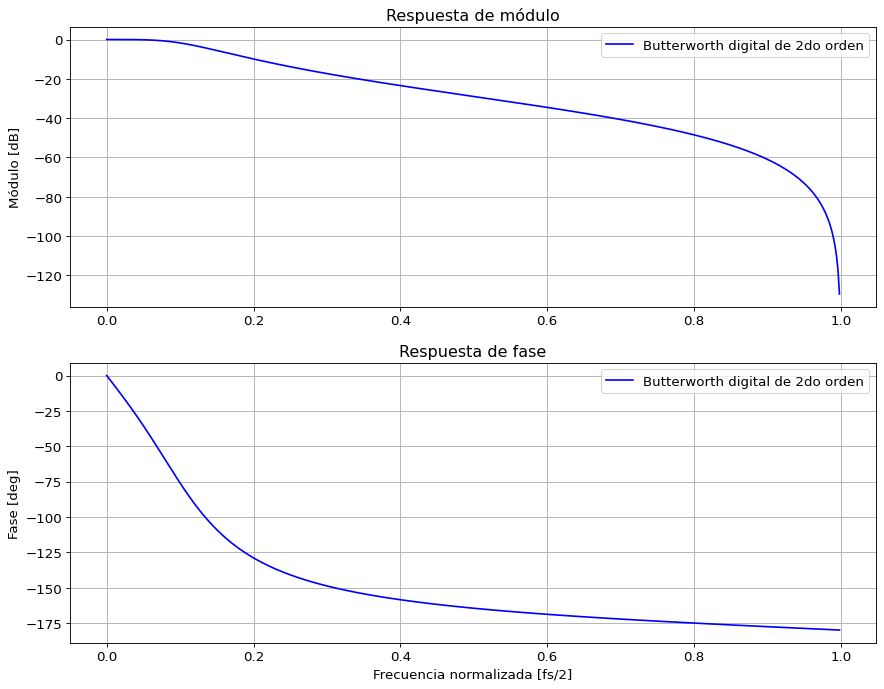

In [8]:
#Ej 2.c
fc = 6e3
fs = 100e3
graf(fc, fs)

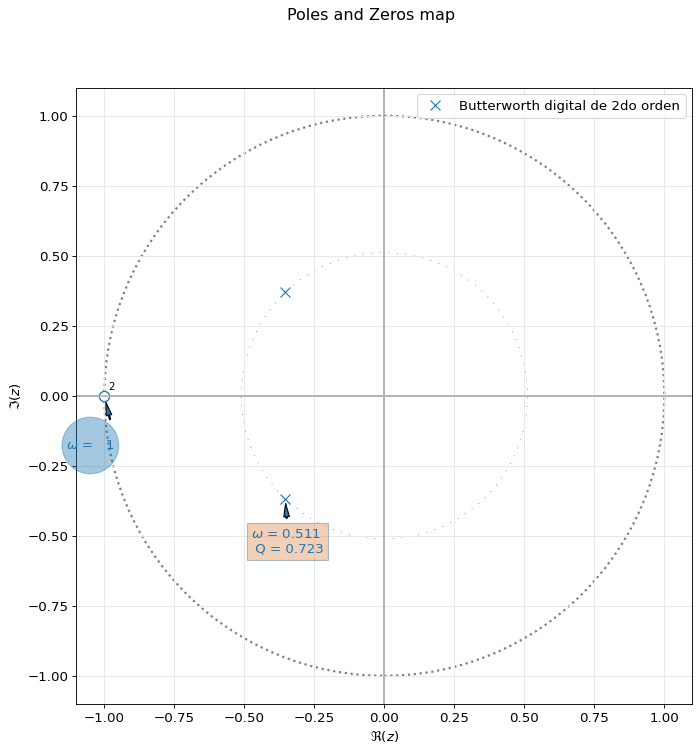

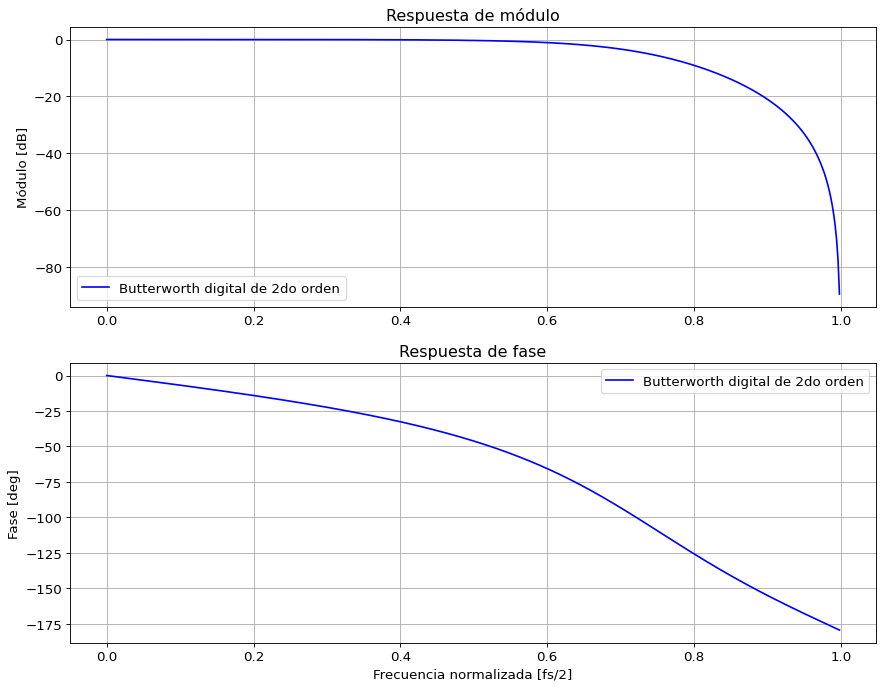

In [9]:
#Ej 2.c
fc = 6e3
fs = 10e3
graf(fc, fs)

2d - En el caso c sería necesario usar prewarping, en los demás no porque los sistemas se ven sobremuestreados.

### <u> Ejercicio 3 </u> ###

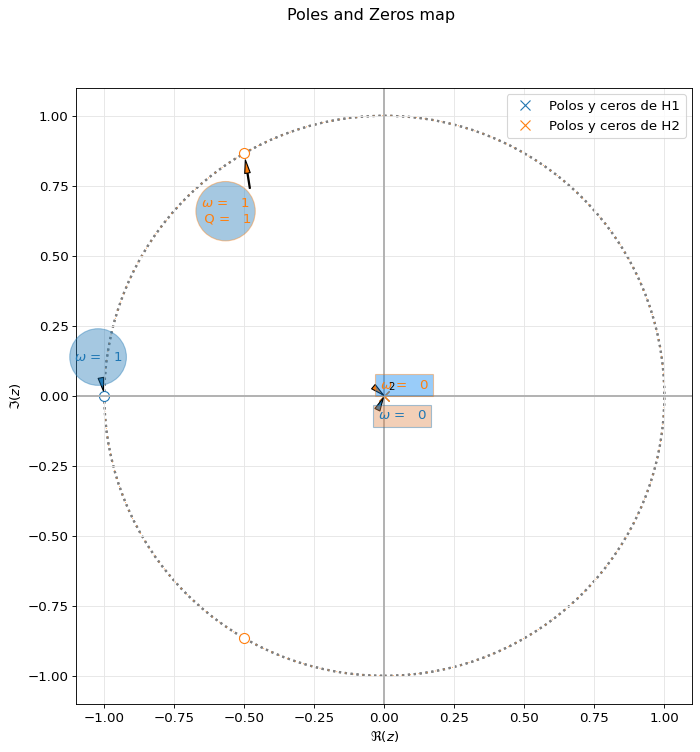

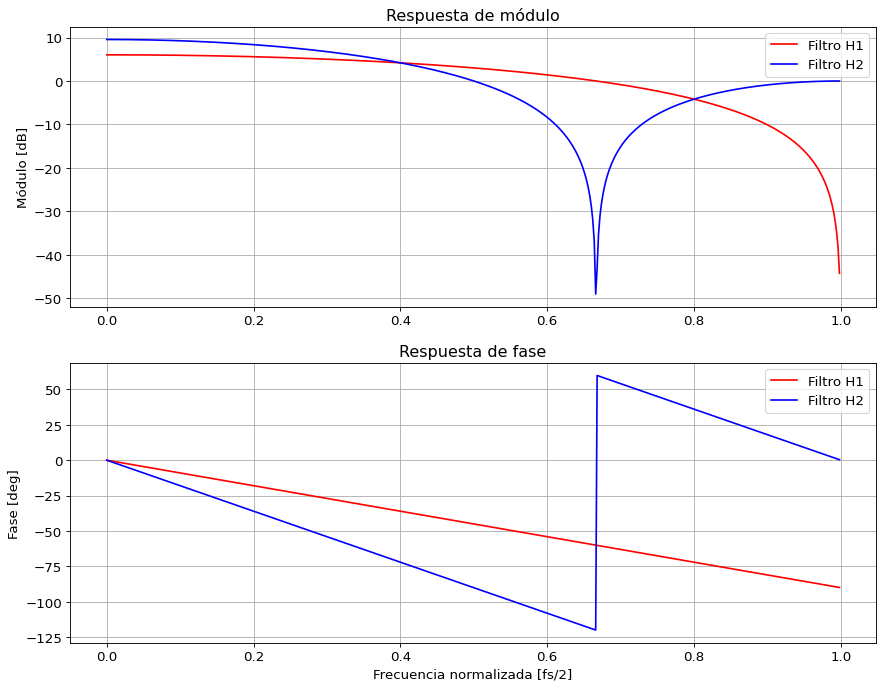

In [10]:
fs = 1e3
norma = fs/2
fs = fs/norma

## Filtros de media móvil

#h1
bn1 = np.array([1, 1])
an1 = np.array([1, 0])
H1 = sig.TransferFunction(bn1, an1, dt=1/fs)

#h2
bn2 = np.array([1, 1, 1])
an2 = np.array([1, 0, 0])
H2 = sig.TransferFunction(bn2, an2, dt=1/fs)

ww_z, hh_1 = sig.freqz(bn1, an1, fs = fs)
_, hh_2 = sig.freqz(bn2, an2, fs = fs)

#Grafico
plt.close('all')

#Polos y ceros
tc2.pzmap(H1, annotations=True, filter_description="Polos y ceros de H1", fig_id=2, digital=True)
tc2.pzmap(H2, annotations=True, filter_description="Polos y ceros de H2", fig_id=2, digital=True)

plt.figure(1)
#Modulo
plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.title("Respuesta de módulo")
plt.ylabel("Módulo [dB]")
plt.plot(ww_z, 20*np.log10(abs(hh_1)), color = 'r', label='Filtro H1')
plt.plot(ww_z, 20*np.log10(abs(hh_2)), color = 'b', label='Filtro H2')
axes_hdl = plt.gca()
axes_hdl.legend()

#Fase
plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.title("Respuesta de fase")
plt.ylabel("Fase [deg]")
plt.xlabel("Frecuencia normalizada [fs/2]")
plt.plot(ww_z, np.angle(hh_1, deg=True), color = 'r', label='Filtro H1')
plt.plot(ww_z, np.angle(hh_2, deg=True), color = 'b', label='Filtro H2')
axes_hdl = plt.gca()
axes_hdl.legend()


/tmp/ipykernel_12729/2309332885.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ww_z, 20*np.log10(abs(hh_1)), color = 'r', label='Filtro H1')
/tmp/ipykernel_12729/2309332885.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ww_z, 20*np.log10(abs(hh_2)), color = 'b', label='Filtro H2')


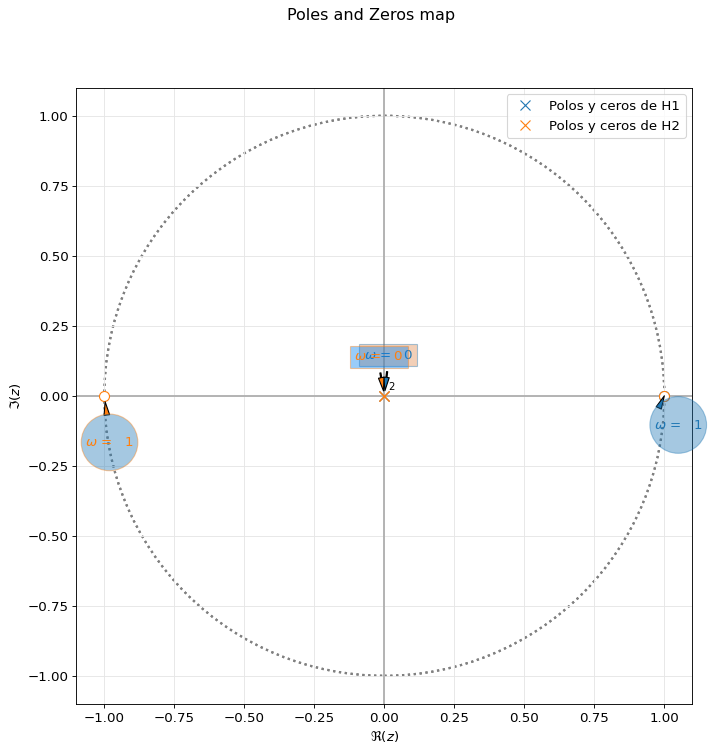

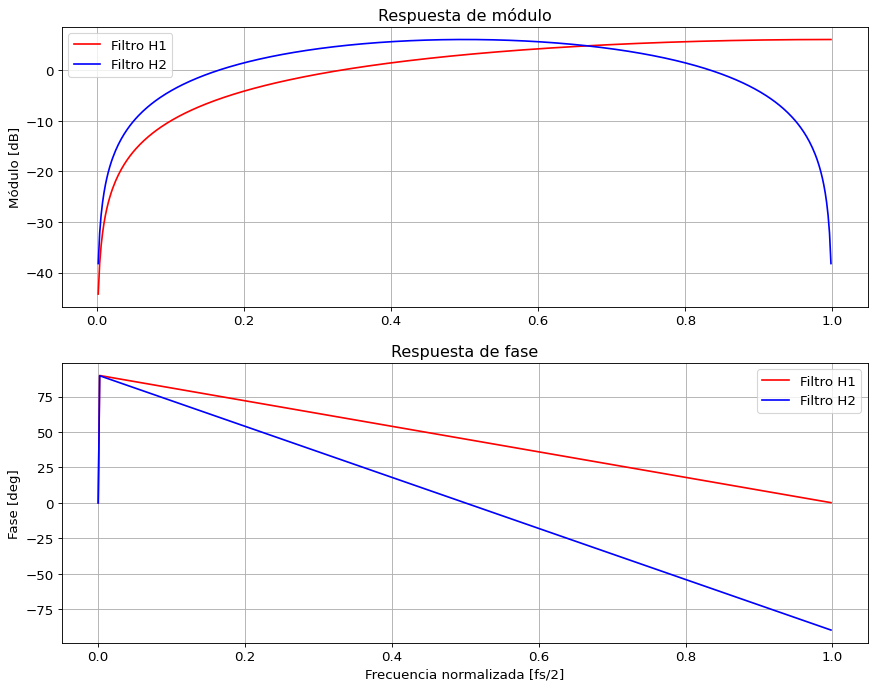

In [11]:
## Filtros diferenciadores

#h1
bn1 = np.array([1, -1])
an1 = np.array([1, 0])
H1 = sig.TransferFunction(bn1, an1, dt=1/fs)

#h2
bn2 = np.array([1, 0, -1])
an2 = np.array([1, 0, 0])
H2 = sig.TransferFunction(bn2, an2, dt=1/fs)

ww_z, hh_1 = sig.freqz(bn1, an1, fs = fs)
_, hh_2 = sig.freqz(bn2, an2, fs = fs)

#Grafico
plt.close('all')

#Polos y ceros
tc2.pzmap(H1, annotations=True, filter_description="Polos y ceros de H1", fig_id=2, digital=True)
tc2.pzmap(H2, annotations=True, filter_description="Polos y ceros de H2", fig_id=2, digital=True)

plt.figure(1)
#Modulo
plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.title("Respuesta de módulo")
plt.ylabel("Módulo [dB]")
plt.plot(ww_z, 20*np.log10(abs(hh_1)), color = 'r', label='Filtro H1')
plt.plot(ww_z, 20*np.log10(abs(hh_2)), color = 'b', label='Filtro H2')
axes_hdl = plt.gca()
axes_hdl.legend()

#Fase
plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.title("Respuesta de fase")
plt.ylabel("Fase [deg]")
plt.xlabel("Frecuencia normalizada [fs/2]")
plt.plot(ww_z, np.angle(hh_1, deg=True), color = 'r', label='Filtro H1')
plt.plot(ww_z, np.angle(hh_2, deg=True), color = 'b', label='Filtro H2')
axes_hdl = plt.gca()
axes_hdl.legend()

Concuerda con lo resuelto analíticamente.

## <u> Punto 2 </u> ##

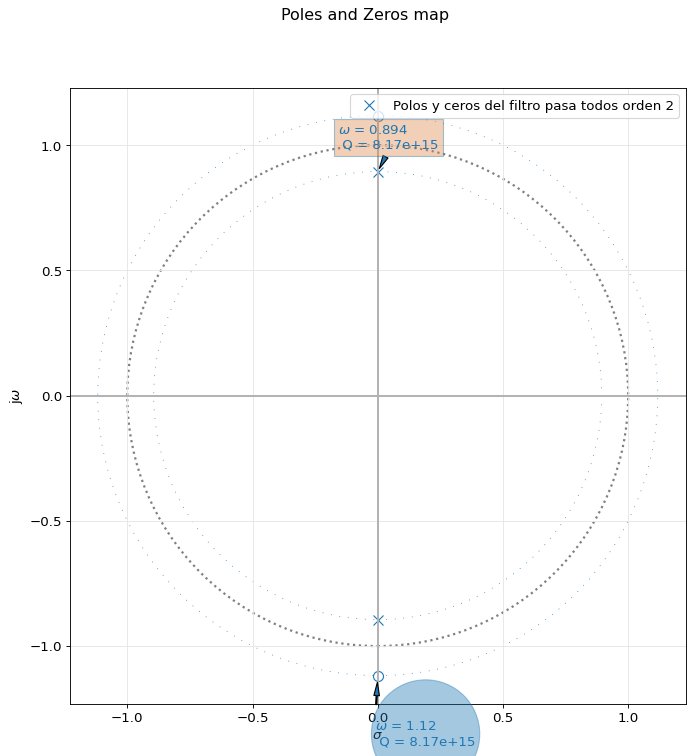

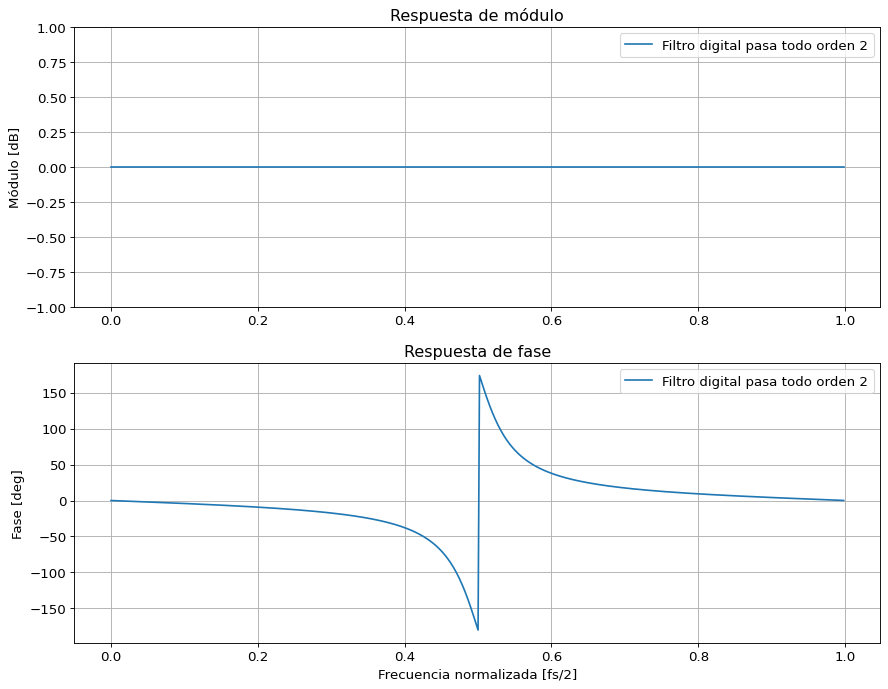

In [14]:
fs = 1e3
fs /= fs/2

alpha = 0.8

# item a

bn = [alpha, 0, 1]
an = [1, 0, alpha]

tf = sig.TransferFunction(bn, an)

ww_z , hh_z = sig.freqz(bn, an, fs = fs)

#Polos y ceros
tc2.pzmap(tf, annotations=True, filter_description="Polos y ceros del filtro pasa todos orden 2", fig_id=2, digital=True)

plt.figure(1)
#Modulo
plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.title("Respuesta de módulo")
plt.ylabel("Módulo [dB]")
plt.plot(ww_z, 20*np.log10(abs(hh_z)), label='Filtro digital pasa todo orden 2')
plt.ylim(-1, 1)
axes_hdl = plt.gca()
axes_hdl.legend()
#Fase
plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.title("Respuesta de fase")
plt.ylabel("Fase [deg]")
plt.xlabel("Frecuencia normalizada [fs/2]")
plt.plot(ww_z, np.angle(hh_z, deg=True), label='Filtro digital pasa todo orden 2')
axes_hdl = plt.gca()
axes_hdl.legend()



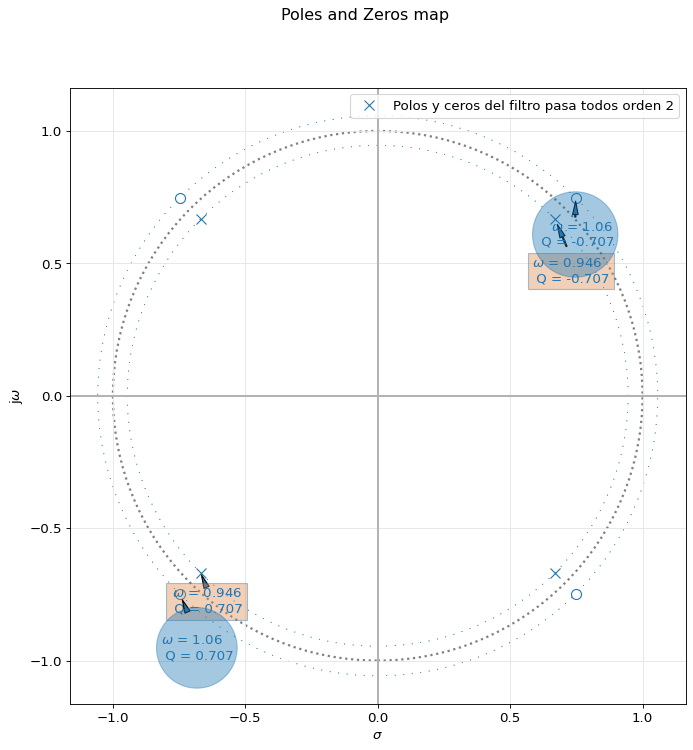

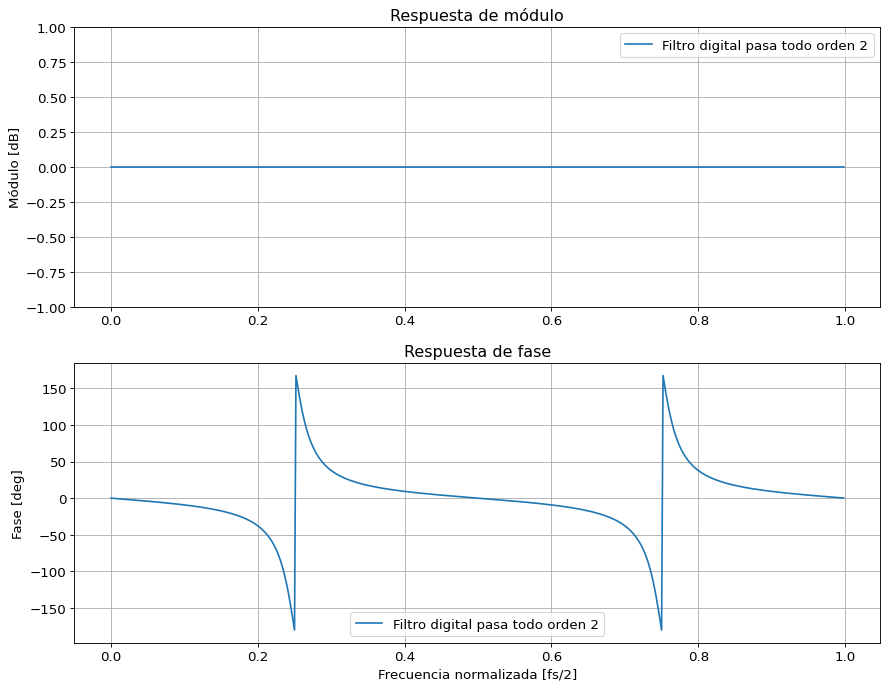

In [15]:
fs = 1e3
fs /= fs/2

alpha = 0.8

# item b

bn = [alpha, 0 , 0, 0, 1]
an = [1, 0, 0, 0, alpha]

tf = sig.TransferFunction(bn, an)

ww_z , hh_z = sig.freqz(bn, an, fs = fs)

#Polos y ceros
tc2.pzmap(tf, annotations=True, filter_description="Polos y ceros del filtro pasa todos orden 2", fig_id=2, digital=True)

plt.figure(1)
#Modulo
plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.title("Respuesta de módulo")
plt.ylabel("Módulo [dB]")
plt.plot(ww_z, 20*np.log10(abs(hh_z)), label='Filtro digital pasa todo orden 2')
plt.ylim(-1, 1)
axes_hdl = plt.gca()
axes_hdl.legend()
#Fase
plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.title("Respuesta de fase")
plt.ylabel("Fase [deg]")
plt.xlabel("Frecuencia normalizada [fs/2]")
plt.plot(ww_z, np.angle(hh_z, deg=True), label='Filtro digital pasa todo orden 2')
axes_hdl = plt.gca()
axes_hdl.legend()


### <u> Conclusión </u> ###

Lo hecho en el desarrollo analítico es congruente con las simulaciones numéricas. Además, se puede verificar que, al igual que en el mundo analógico, es posible diseñar un elimina banda/notch con un pasa todo y un sumador.